# Geospatial Data Exploration Task for Remote Sensing Internship 2023

# Name:SALINI M S,M.TECH (2021-2023),INDIAN INSTITUTE OF SPACE SCIENCE AND TECHNOLOGY

In [94]:
import netCDF4 as nc
import numpy as np
import geopandas as gpd
import rasterio
import rasterio.mask
import numpy.ma as ma

# Loading datacube
file = nc.Dataset(r"\Desktop\Spacesense_internship_task\geospatial_test_datacube_new.nc", mode='a')


In [67]:
# Get the list of variables in the file
var_list = file.variables.keys()

# Print the list of variables
print(var_list)


dict_keys(['time', 'S2_RED', 'S2_GREEN', 'S2_BLUE', 'S2_NIR', 'y', 'x'])


In [68]:
# Loading Geojson-AOI
aoi=gpd.read_file(r"\Spacesense_internship_task\geospatial_sub_aoi_n.geojson")

In [69]:
# Get the keys of the dictionary
keys = aoi.keys()

# Print the keys
print(keys)

Index(['geometry'], dtype='object')


In [70]:

# Extract the variables containing the latitude and longitude coordinates from the data cube
lat = file.variables['y'][:]
lon = file.variables['x'][:]

# Get the affine transformation from the data cube
affine = rasterio.transform.from_bounds(lon.min(), lat.min(), lon.max(), lat.max(), len(lon), len(lat))


In [7]:
# Create a raster mask from the AOI using the rasterio.features.geometry_mask function
mask = rasterio.features.geometry_mask(aoi.geometry, out_shape=(len(lat), len(lon)), transform=affine, invert=False)

In [8]:
# Create an empty array to hold the NDVI data with mask
ndvi_data = np.zeros((file.dimensions['time'].size, len(lat), len(lon)), dtype=np.float32)

In [71]:
# Create an empty array to hold the NDVI data without mask
ndvi_not_masked = np.zeros((file.dimensions['time'].size, len(lat), len(lon)), dtype=np.float32)

In [95]:
# Initialize an empty list to store the NDVI average values
ndvi_averages = []

# Loop over each time step in the data cube
for i, time in enumerate(file.variables['time'][:]):
    # Extract the red and near-infrared bands from the data cube
    red = file.variables['S2_RED'][i, :, :]
    nir = file.variables['S2_NIR'][i, :, :]

    # Calculate the NDVI for the entire AOI
    ndvi = (nir - red) / (nir + red)
    
    # Set the NDVI values within AOI
    ndvi_masked= ma.array(ndvi, mask=mask)
    
    # Add the NDVI data to the ndvi_data array
    ndvi_data[i, :, :] = ndvi_masked.filled(fill_value=np.nan)
    
    # Calculate the average NDVI value for the AOI
    ndvi_average = ma.mean(ndvi_masked)
    
    ndvi_not_masked[i, :, :] = ndvi
    
    # Append the NDVI average to the list
    ndvi_averages.append(ndvi_average)


In [73]:
# Add the NDVI data as a separate variable to the data cube
ndvi_var = file.createVariable('NDVI', 'f4', ('time', 'y', 'x'))
ndvi_var[:] = ndvi_data
ndvi_var.units = 'NDVI'

In [74]:
print(ndvi_data[1,:,:])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [75]:
print(ndvi_data[2,:,:])

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [76]:
print(ndvi_not_masked[1,:,:])

[[0.44147158 0.44147158 0.54115593 ... 0.7959596  0.78008753 0.78008753]
 [0.7433155  0.7433155  0.75518537 ... 0.77339894 0.782801   0.782801  ]
 [0.75450593 0.75450593 0.7139296  ... 0.74929094 0.7554786  0.7554786 ]
 ...
 [0.575419   0.48490632 0.48490632 ... 0.61928934 0.46347305 0.5401739 ]
 [0.6726191  0.52166224 0.52166224 ... 0.45841727 0.50558114 0.70779717]
 [0.682625   0.60411316 0.60411316 ... 0.45105013 0.744631   0.75854206]]


In [77]:
print(ndvi_not_masked[2,:,:])

[[0.44123077 0.44123077 0.47889563 ... 0.7686567  0.7950451  0.7950451 ]
 [0.6407422  0.6407422  0.6705978  ... 0.77262175 0.8059451  0.8059451 ]
 [0.7638026  0.7638026  0.7201167  ... 0.7974514  0.7865707  0.7865707 ]
 ...
 [0.5633528  0.49007395 0.49007395 ... 0.6164179  0.50069743 0.54401475]
 [0.62919134 0.5110384  0.5110384  ... 0.4371567  0.5498875  0.68230194]
 [0.68008953 0.58588475 0.58588475 ... 0.40140587 0.73648655 0.7468152 ]]


In [78]:
# Get the dimensions of the datacube
print("Dimensions:")
for dim in file.dimensions:
    print(dim, len(file.dimensions[dim]))

Dimensions:
time 23
y 227
x 304


In [79]:
ndvi_data.shape

(23, 227, 304)

In [80]:
#Checking whether the layer has been added to the datacube
# Get the list of variables in the file
var_list = file.variables.keys()

# Print the list of variables
print(var_list)


dict_keys(['time', 'S2_RED', 'S2_GREEN', 'S2_BLUE', 'S2_NIR', 'y', 'x', 'NDVI'])


# b.Visualize rgb image of one date

In [82]:
new_f=nc.Dataset(r"C:\Users\OMAN1KOR\Desktop\Spacesense_internship_task\geospatial_test_datacube_new.nc")

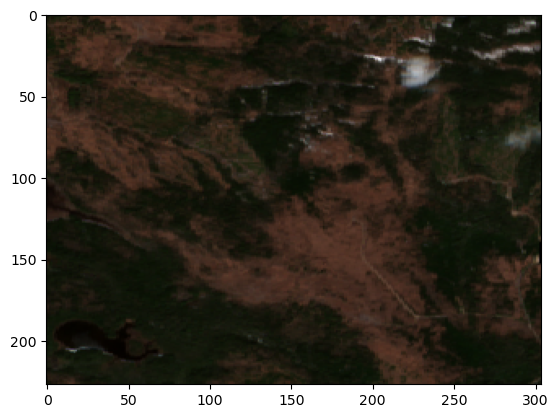

In [81]:
import matplotlib.pyplot as plt

# Define the date to visualize
date = 0

# Extract the red, green, and blue bands
red_band = new_f.variables['S2_RED'][date, :, :]
green_band = new_f.variables['S2_GREEN'][date, :, :]
blue_band = new_f.variables['S2_BLUE'][date, :, :]

# Close the NetCDF file
file.close()

# Stack the bands into an RGB image
rgb_image = np.dstack((red_band, green_band, blue_band))

# Normalize the image
rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Plot the image
plt.imshow(rgb_image)
plt.show()

# c.Distribution (histogram) of NDVI pixels

In [ ]:
# ndvi_masked of each date is selected

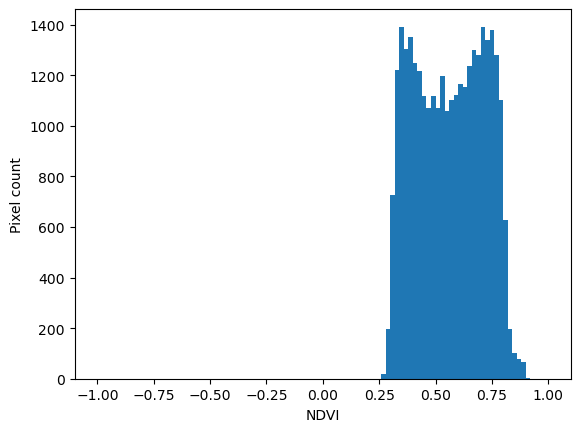

In [83]:
# Flatten the NDVI array to create a 1D array of pixels
ndvi_pixels = ndvi_data[1,:,:].flatten()

# Compute the histogram of NDVI pixels
hist, bins = np.histogram(ndvi_pixels, bins=100, range=(-1, 1))

# Plot the histogram
plt.hist(ndvi_pixels, bins=100, range=(-1, 1))
plt.xlabel('NDVI')
plt.ylabel('Pixel count')
plt.show()

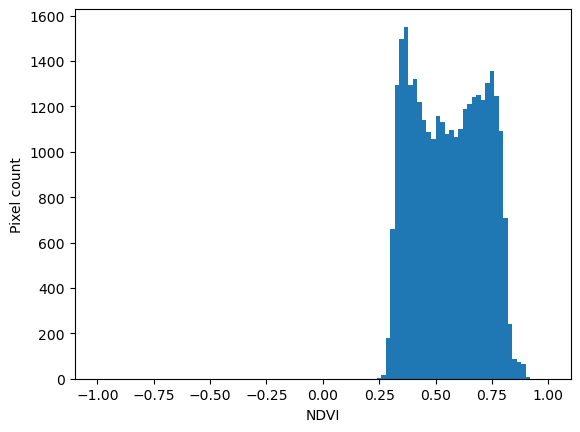

In [84]:
# Flatten the NDVI array to create a 1D array of pixels
ndvi_pixels = ndvi_data[2,:,:].flatten()

# Compute the histogram of NDVI pixels
hist, bins = np.histogram(ndvi_pixels, bins=100, range=(-1, 1))

# Plot the histogram
plt.hist(ndvi_pixels, bins=100, range=(-1, 1))
plt.xlabel('NDVI')
plt.ylabel('Pixel count')
plt.show()

In [ ]:
#ndvi without mask is selected

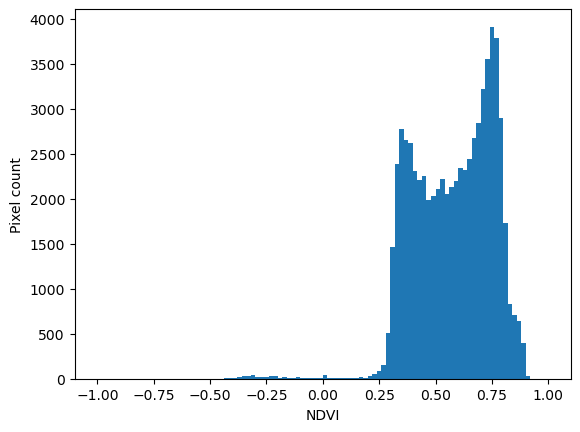

In [85]:
# Flatten the NDVI array to create a 1D array of pixels
ndvi_pixels = ndvi_not_masked[1,:,:].flatten()

# Compute the histogram of NDVI pixels
hist, bins = np.histogram(ndvi_pixels, bins=100, range=(-1, 1))

# Plot the histogram
plt.hist(ndvi_pixels, bins=100, range=(-1, 1))
plt.xlabel('NDVI')
plt.ylabel('Pixel count')
plt.show()

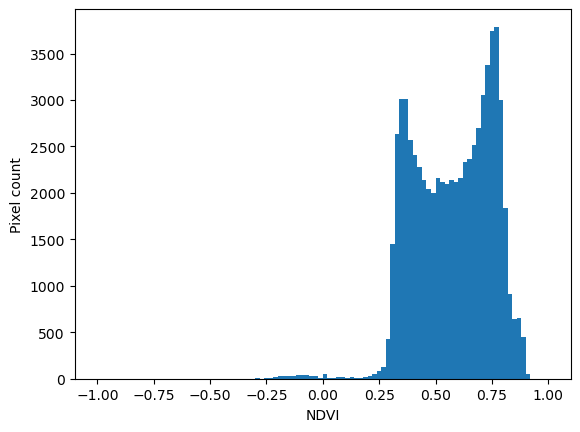

In [86]:
# Flatten the NDVI array to create a 1D array of pixels
ndvi_pixels = ndvi_not_masked[2,:,:].flatten()

# Compute the histogram of NDVI pixels
hist, bins = np.histogram(ndvi_pixels, bins=100, range=(-1, 1))

# Plot the histogram
plt.hist(ndvi_pixels, bins=100, range=(-1, 1))
plt.xlabel('NDVI')
plt.ylabel('Pixel count')
plt.show()

# d.Time series of NDVI averaged over the AOI

In [97]:
new_f=nc.Dataset(r"C:\Users\OMAN1KOR\Desktop\Spacesense_internship_task\geospatial_test_datacube_new.nc")

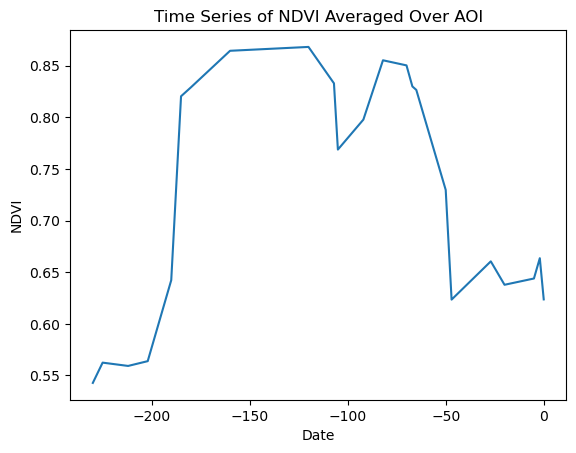

In [98]:
plt.plot(file.variables['time'][:], ndvi_averages)
plt.title('Time Series of NDVI Averaged Over AOI')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.show()
# Close the dataset
new_f.close()

# 2)A brief description of your interpretation of the spatial distribution and evolution of the NDVI/vegetation

One of the key metrics used in remote sensing to assess a region's level of vegetation is the NDVI 
(Normalized Difference Vegetation Index), which measures how green the foliage is.Agroforestry is indicated by an NDVI 
between 0.3 and 0.5, while forest is indicated by one between 0.5 and 1.Agroforestry dominates the area we are interested 
in,and it has been growing denser over the time.Without the masked area, the entire datacube's NDVI value ranged from 
-0.1 to 1,with some barren territory and water.For instance, a tendency towards rising NDVI values may signify an increase
in vegetation cover as a result of seasonal rainfall, whereas a trend towards falling NDVI values may signify a decrease in
vegetation cover as a result of drought, deforestation, or land degradation.

At start it was getting denser and at the end of the period it was showing similar ndvi distribution as the beginning. Below plot will help to visually explore the NDVI distribution over the area. 

# 3) A visualization of NDVI (colormap here) clipped to the provided sub-AOI

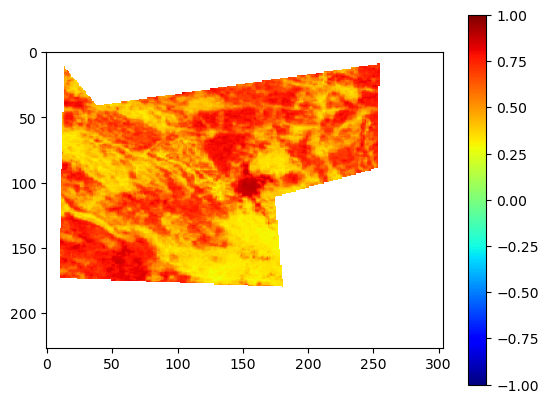

In [99]:
import matplotlib.pyplot as plt

plt.imshow(ndvi_data[1,:,:], cmap='jet', vmin=-1, vmax=1)
plt.colorbar()
plt.show()


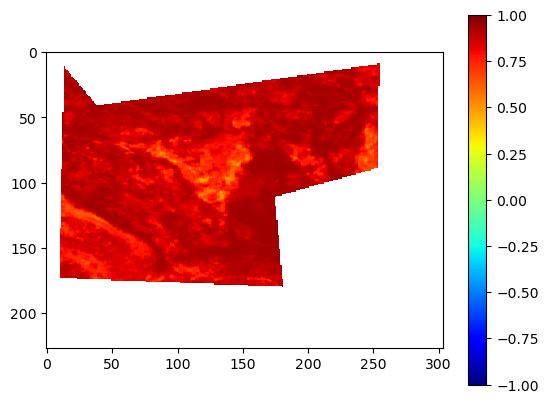

In [100]:
import matplotlib.pyplot as plt

plt.imshow(ndvi_data[7,:,:], cmap='jet', vmin=-1, vmax=1)
plt.colorbar()
plt.show()


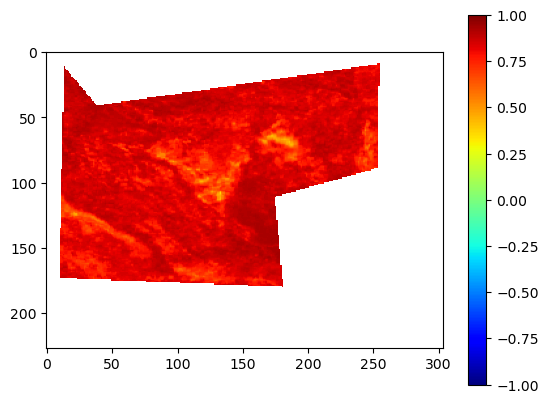

In [110]:
import matplotlib.pyplot as plt

plt.imshow(ndvi_data[15,:,:], cmap='jet', vmin=-1, vmax=1)
plt.colorbar()
plt.show()


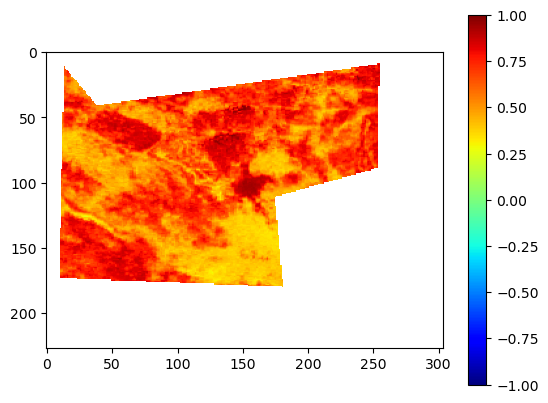

In [109]:
import matplotlib.pyplot as plt

plt.imshow(ndvi_data[22,:,:], cmap='jet', vmin=-1, vmax=1)
plt.colorbar()
plt.show()


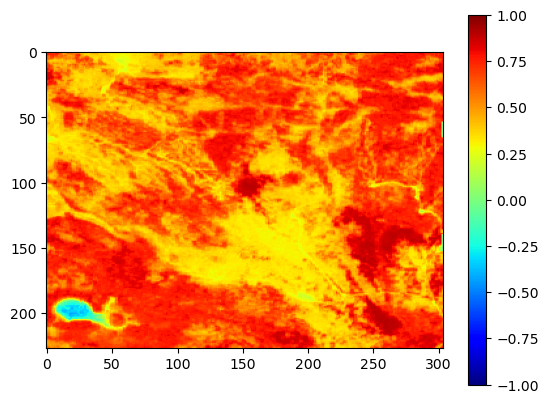

In [103]:
#Display ndvi values without masking

import matplotlib.pyplot as plt

plt.imshow(ndvi_not_masked[1,:,:], cmap='jet', vmin=-1, vmax=1)
plt.colorbar()
plt.show()
